Clase 1 - Respuesta espectral
============================================

### SoPI II: Herramientas de teledetección cuantitativa

Este notebook se apoya en el notebook `Clase-1-b` para levantar una firma espectral y graficarla. Después lo que vamos a hacer es definir distintos modelos de filtros (triangular, cuadrado, gaussiano,etc) y ver cuanto vale el valor de la reflectancia para dicho filtro.

La idea es que lo que hace el sensor es calcular el promedio de la firma con algún peso $w_\lambda$. Es decir que el valor de reflectancia de un píxel $p_i$ de una firma espectral $f_\lambda$  esta dado por

$$ p_i = \sum w_\lambda f_\lambda $$

### Carga de librerias

Recuerde que debe ejecutar **siempre** primero la celda que carga las librerias para ejecutar los procesos.

In [1]:
# Cargamos las librerais
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Fijamos que muestre los graficos dentro de la linea
%matplotlib inline

### Grafico de firmas espectrales

En este caso graficaremos la firma espectral a partir de un archivo que contiene la reflectancia en funcion de la longitud de onda.

Comenzamos leyendo el archivo que contiene la firma espectral. A diferencia que en el caso anterior usaremos la estructura de Dataframe de Pandas para realizar la lectura.

**Observacion:** No instalamos pandas como uno de las librerias de python originales. Para instalarlo abran una terminal como se explicó en el tutorial y escriban 

    `conda install pandas`


In [52]:
# Nombre del archivo con la firma espectral a utilizar
firma_in = "../../material/firmas/A11_2.txt"

# Lectura de la firma espectral
firma = pd.read_csv(firma_in, skiprows=7, index_col=0, header=None,delim_whitespace=True)

# Definimos los nombres de las columnas
firma.columns = ['Min.','Media-Desvio','Media','Media+Desvio','Max']

Podemos graficar ahora la firma espectral graficando la columna `Media` del dataframe.

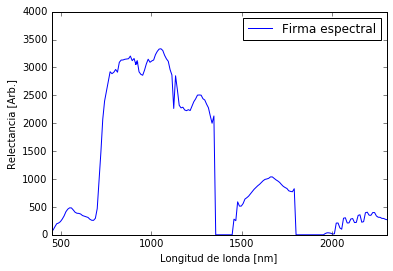

In [53]:
# Grafico la reflectancia contra la longitud de onda
firma.plot(y='Media', label='Firma espectral')

# Configuraciones de ploteo. 
# Cambiar bajo su propio riesto
# Pongo el limite en x e y
plt.xlim(450,2300)
plt.ylim(0,4000)
# Incluyo la leyenda
plt.legend(numpoints=1)
# Pongo nombres a los ejes
plt.xlabel("Longitud de londa [nm]")
plt.ylabel("Relectancia [Arb.]")

# Muestro el grafico
plt.show()

Definamos ahora el filtro a utilizar. Lo vamos a crear en donde estaría la banda del infrarrojo cercano de Landsat 8 OLI. Entro los los $845 nm$ y los $885 nm$.

In [115]:
lmin = 760
lmax = 900

# Filtro cuadrado
# Creamon la columna del filtro cuadrado con todos ceros
firma['Cuadrado'] = 0
# Le asignamos a los valores entre lmin y lmax el valor 1
firma.loc[(firma.index > lmin) & (firma.index < lmax ),'Cuadrado'] = 1

# Filtro Gaussiano
# Distribuimos los valores de forma gaussiana
mean = (lmin+lmax)/2
# Tomamos sigma para que la altura a media anchura sea (885-845)/2.
sigma = (lmax-lmin)/2/(2*np.sqrt(2*np.log(2))) 
# Creamon la columna del filtro cuadrado con todos ceros
firma['Gauss'] = np.exp(-(firma.index-mean)**2/(2*np.pi*sigma**2))

Podemos ahora mostrar los dos filtros, el Gaussiano y el Cuadrado y ver que son diferentes. En ambos casos normalizamos los filtros a 1.

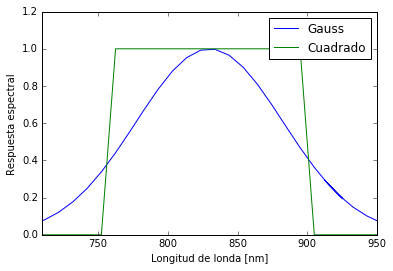

In [116]:
# grafico los filtros.
firma.plot(y=['Gauss','Cuadrado'])

# Configuraciones de ploteo. 
# Cambiar bajo su propio riesto
# Pongo el limite en x e y
plt.xlim(lmin-50,lmax+50)
plt.ylim(0,1.2)
# Incluyo la leyenda
plt.legend(numpoints=1)
# Pongo nombres a los ejes
plt.xlabel("Longitud de londa [nm]")
plt.ylabel("Respuesta espectral")

# Muestro el grafico
plt.show()


Podemos calcular ahora promedio usando como función de pesos los filtros cuadrado y guassiano y comparar sus valores

In [117]:
print(np.average(firma.Media, weights = firma.Cuadrado))
print(np.average(firma.Media, weights = firma.Gauss))

3033.9117175
2958.58925328
